- Objetivo: Visualizar e analisar uma rede de viagem no tempo que conecta diferentes épocas históricas através de eventos ou inovações significativas.
- Dados: Criaremos uma série de nós que representam momentos-chave na história da humanidade e conectaremos esses momentos com arestas que simbolizam descobertas ou eventos importantes que levam de uma época a outra.
- Análise: Exploraremos como os eventos influenciam o progresso humano ao longo do tempo e identificaremos os principais eventos que atuam como pontes entre diferentes eras.

### Etapas
- Definição de Épocas e Eventos: As épocas são adicionadas ao grafo como nós, e cada época está conectada à próxima por um evento ou descoberta importante que atua como uma ponte no tempo.
- Visualização da Rede: A rede é visualizada com o layout spring, que tenta posicionar os nós de maneira que aqueles conectados por arestas fiquem mais próximos, representando visualmente a conexão temporal entre as épocas.
- Detalhes da Rede: Cada conexão entre as épocas é rotulada com o evento que representa a transição histórica, facilitando a compreensão de como um período levou ao outro.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Lista de épocas e eventos importantes que conectam essas épocas
epochs = {
    'Antiguidade': {'Ano': -500},
    'Idade Média': {'Ano': 1000},
    'Renascimento': {'Ano': 1500},
    'Revolução Industrial': {'Ano': 1800},
    'Era Moderna': {'Ano': 1900},
    'Era da Informação': {'Ano': 2000}
}

In [3]:
# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionando nós (épocas) ao grafo com atributo temporal
for epoch, data in epochs.items():
    G.add_node(epoch, year=data['Ano'])

In [4]:
# Adicionando arestas (eventos significativos)
edges = [
    ('Antiguidade', 'Idade Média', 'Queda do Império Romano'),
    ('Idade Média', 'Renascimento', 'Invenção da imprensa'),
    ('Renascimento', 'Revolução Industrial', 'Iluminismo'),
    ('Revolução Industrial', 'Era Moderna', 'Revolução Científica'),
    ('Era Moderna', 'Era da Informação', 'Invenção do computador')
]
for src, dst, event in edges:
    G.add_edge(src, dst, event=event)

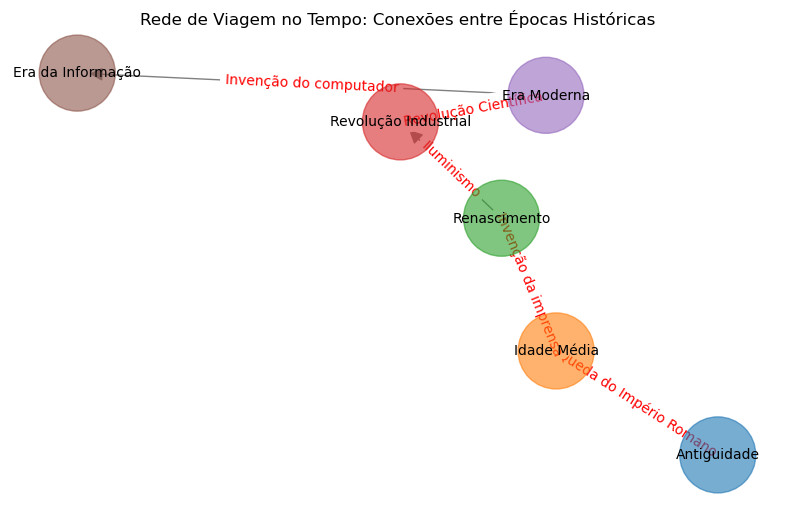

In [5]:
# Desenhando a rede de viagem no tempo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Posicionamento dos nós
colors = list(mcolors.TABLEAU_COLORS.values())  # Cores para os nós

nx.draw_networkx_nodes(G, pos, node_color=colors[:len(G)], node_size=3000, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=1)
edge_labels = nx.get_edge_attributes(G, 'event')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Rede de Viagem no Tempo: Conexões entre Épocas Históricas')
plt.axis('off')  # Ocultar os eixos
plt.show()
